In [148]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Descenso de gradiente de un valor absoluto

In [149]:
f = lambda x: abs(x-2)
D = lambda f,x,h=1e-5: (f(x+h) - f(x-h))/(2*h)

def Minimizer(f, N=300, gamma=0.01):
    
    r = np.zeros(N)
    # Seed
    r[0] = 4
    
    for i in tqdm(range(1,N)):
        r[i] = r[i-1] - gamma*D(f,r[i-1])
        
    return r

El mínimo de la funcion es 2. Entonces grafiquemos la distancia hasta este punto.

100%|██████████| 299/299 [00:00<00:00, 299951.42it/s]


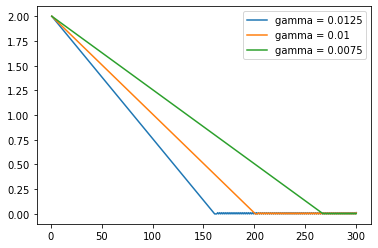

In [150]:
gammas = [0.0125,0.01,0.0075]
for i in gammas:
    r = Minimizer(f,gamma=i)
    d = np.abs(r-2)
    its = np.linspace(1,300,300)
    plt.plot(its,d,label='gamma = ' + str(i))
plt.legend()

100%|██████████| 299/299 [00:00<?, ?it/s]


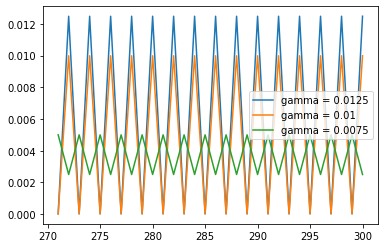

In [151]:
for i in gammas:
    r = Minimizer(f,gamma=i)
    d = np.abs(r-2)
    plt.plot(its[270:],d[270:],label='gamma = ' + str(i))
plt.legend()

Como f(x)=|x-2| es la composición de 2 funciones lineales. La deribada de f(x) es constante y el método de descenso de gradiente baja hacia el mínimo a un ritmo siempre constante. Esto hace que el tiempo en llegar a la vecindad del mínimo sea directamente proporcional a la distancia de partida e inversamente proporcional a la tasa de aprendizaje. Además, al llegar a inmediaciones del mínimo se quedará oscilando indefinidamente en los mismos puntos a cada lado del mínimo cuyas proximidades a este dependen de la tasa de aprendizaje como lo muestran las gráficas.

Por lo tanto, podemos concluir que el método de descenso de gradiente no es conveniente en este caso.